# Patching `input()` for notebook

In [269]:
input_buffer = []


def set_input_buffer(input_string):
  global input_buffer
  input_buffer = input_string.strip().split('\n')


def input():
  if input_buffer:
    return input_buffer.pop(0)
  else:
    raise Exception("input buffer is empty")

# Some algorithms

In [270]:
import heapq


class PriorityQueue:
  def __init__(self):
    self.heap = []

  def is_empty(self):
    return len(self.heap) == 0

  def enqueue(self, priority, item):
    heapq.heappush(self.heap, (priority, item))

  def dequeue(self):
    return heapq.heappop(self.heap)[1]  # [0] is priority, [1] is item


def dijkstra(adjacency_list, start_vertex):
  visited = {vertex: False for vertex in adjacency_list}
  distance = {vertex: float('inf') for vertex in adjacency_list}
  distance[start_vertex] = 0

  pq = PriorityQueue()
  pq.enqueue(0, start_vertex)

  # process the queue until it's empty
  while not pq.is_empty():
    current_vertex = pq.dequeue()
    visited[current_vertex] = True

    # update distances to neighbors
    for neighbor in adjacency_list[current_vertex]:
      if not visited[neighbor]:
        new_distance = distance[current_vertex] + 1
        if new_distance < distance[neighbor]:
          distance[neighbor] = new_distance
          pq.enqueue(new_distance, neighbor)

  return distance

# Queue & Stack

In [271]:
class Queue:
  def __init__(self):
    self.data = []

  def is_empty(self):
    return len(self.data) == 0

  def enqueue(self, value):
    self.data.append(value)

  def dequeue(self):
    return self.data.pop(0)

  def __str__(self):
    return str(self.data)


queue = Queue()
queue.enqueue(10)
queue.enqueue(20)
queue.enqueue(30)

print(queue.dequeue())
print(queue.dequeue())
queue.enqueue(40)
print(queue.dequeue())
print(queue)

10
20
30
[40]


In [272]:
class Stack:
  def __init__(self):
    self.data = []

  def is_empty(self):
    return len(self.data) == 0

  def push(self, value):
    self.data.append(value)

  def pop(self):
    return self.data.pop()

  def __str__(self):
    return str(self.data)


stack = Stack()
stack.push(10)
stack.push(20)
stack.push(30)

print(stack.pop())
print(stack.pop())
stack.push(40)
print(stack.pop())
print(stack)

30
20
40
[10]


# Convert adjacency matrix to adjacency list

In [273]:
def adjacency_matrix_to_list(adjacency_matrix):
  n = len(adjacency_matrix)
  adjacency_list = {i: [] for i in range(n)}

  for i in range(n):
    for j in range(n):
      if adjacency_matrix[i][j] == 1:
        adjacency_list[i].append(j)
  return adjacency_list


adjacency_matrix = [[0, 1, 1, 0, 0, 0, 0],
                    [1, 0, 1, 1, 1, 1, 0],
                    [1, 1, 0, 1, 1, 1, 0],
                    [0, 1, 1, 0, 1, 0, 0],
                    [0, 1, 1, 1, 0, 1, 0],
                    [0, 1, 1, 0, 1, 0, 1],
                    [0, 0, 0, 0, 0, 1, 0]]

adjacency_matrix_to_list(adjacency_matrix)

{0: [1, 2],
 1: [0, 2, 3, 4, 5],
 2: [0, 1, 3, 4, 5],
 3: [1, 2, 4],
 4: [1, 2, 3, 5],
 5: [1, 2, 4, 6],
 6: [5]}

# GrPA 1

### Walkthrough

1. **Convert the matrix**
   - Change the adjacency matrix into an adjacency list for easier traversal.

2. **BFS**
   - Use BFS to explore each person level by level, starting from Px.

3. **Track levels**
   - Track the number of steps (levels) it takes to reach each person from Px.

4. **Return connectivity level**
   - Return the connection level between Px and Py.

In [274]:
def parse_my_input(my_input):
  data = my_input.strip().split('\n')

  n = int(data[0])
  adjacency_matrix = [list(map(int, data[i+1].split())) for i in range(n)]
  px = int(data[-2])
  py = int(data[-1])

  return n, adjacency_matrix, px, py

In [275]:
def bfs(adjacency_list, start_vertex):
  visited = {vertex: False for vertex in adjacency_list}
  parent = {vertex: None for vertex in adjacency_list}
  level = {vertex: 0 for vertex in adjacency_list}

  queue = Queue()
  queue.enqueue(start_vertex)

  while not queue.is_empty():
    curr_vertex = queue.dequeue()
    if not visited[curr_vertex]:
      visited[curr_vertex] = True

      for adj_vertex in adjacency_list[curr_vertex]:
        if not visited[adj_vertex]:
          queue.enqueue(adj_vertex)

          if parent[adj_vertex] is None:
            parent[adj_vertex] = curr_vertex
            level[adj_vertex] = level[curr_vertex]+1
  return level


def find_connection_level(n, adjacency_matrix, px, py):
  adjacency_list = adjacency_matrix_to_list(adjacency_matrix)  # helper function
  level = bfs(adjacency_list, px)  # helper function
  return level[py]


find_connection_level(*parse_my_input("""
7
0 1 1 0 0 0 0
1 0 1 1 1 1 0
1 1 0 1 1 1 0
0 1 1 0 1 0 0
0 1 1 1 0 1 0
0 1 1 0 1 0 1
0 0 0 0 0 1 0
6
0
"""))

3

# GrPA 2

### Walkthrough

1. **BFS**
   - Implement BFS to explore the network starting from a given tank and mark all reachable tanks as visited.

2. **Make adjacency list**
   - Convert the list of pipes into an adjacency list for easier traversal.

3. **Check each tank**
   - For each tank, run BFS to see if all other tanks are reachable from it.

4. **Return master tank**
   - If a tank can reach all other tanks, return that tank as the master tank. If no such tank exists, return 0.

In [276]:
def parse_my_input(my_input):
  data = my_input.strip().split('\n')

  V = list(map(int, data[0].split()))
  E = [list(map(int, edge.split())) for edge in data[2:]]

  return V, E

In [277]:
def bfs(adjacency_list, start_vertex):
  visited = {vertex: False for vertex in adjacency_list}
  order = []

  queue = Queue()
  queue.enqueue(start_vertex)

  while not queue.is_empty():
    curr_vertex = queue.dequeue()
    if not visited[curr_vertex]:
      visited[curr_vertex] = True
      order.append(curr_vertex)

      for adj_vertex in adjacency_list[curr_vertex]:
        if not visited[adj_vertex]:
          queue.enqueue(adj_vertex)
  return visited


def find_master_tank(tanks, pipes):
  adjacency_list = {u: [] for u in tanks}
  for u, v in pipes:
    adjacency_list[u].append(v)

  for vertex in adjacency_list:
    visited = bfs(adjacency_list, vertex)  # helper function
    if all(visited.values()):
      return vertex
  return 0


find_master_tank(*parse_my_input("""
1 2 3 4
3
1 2
2 3
2 4
"""))

1

# GrPA 3

### Walkthrough

1. **DFS and Topological Sort**
   - Perform DFS to generate a topological order of the graph using the `topological_sort` function.

2. **Longest path calculation**
   - Initialize longest path lengths to -1 and set the start node's length to 0.
   - Maintain a predecessor dictionary to trace paths.

3. **Path reconstruction**
   - Identify the node with the maximum path length.
   - Reconstruct the path from this node back to the start using the predecessor dictionary.

In [278]:
def dfs(adjacency_list, curr_vertex, visited, stack):
  visited[curr_vertex] = True

  for neighbor in adjacency_list[curr_vertex]:
    if not visited[neighbor]:
      dfs(adjacency_list, neighbor, visited, stack)

  stack.append(curr_vertex)


def topological_sort(adjacency_list):
  visited = {vertex: False for vertex in adjacency_list}
  stack = []

  for vertex in adjacency_list:
    if not visited[vertex]:
      dfs(adjacency_list, vertex, visited, stack)

  # the stack contains the topologically sorted order in reverse
  return stack[::-1]

In [279]:
def longest_path(adjacency_list):
  # compute topological order
  topological_order = topological_sort(adjacency_list)

  # initialize distance and predecessor
  distance = {vertex: -1 for vertex in adjacency_list}
  predecessor = {vertex: None for vertex in adjacency_list}  # NEW

  # start from the first node in topological order
  start_vertex = topological_order[0]
  distance[start_vertex] = 0

  # compute distance, predecessor
  for parent in topological_order:
    if distance[parent] != -1:  # if parent has a distance assigned
      for child in adjacency_list[parent]:
        new_distance = distance[parent] + 1
        if new_distance > distance[child]:
          distance[child] = new_distance
          predecessor[child] = parent  # NEW

  return distance, predecessor


def display_path_info(distance, predecessor):
  # display information for visualization
  sorted_vertices = sorted(distance, key=distance.get)
  display([(vertex, distance[vertex], predecessor[vertex]) for vertex in sorted_vertices])


def reconstruct_path(last_vertex, predecessor):
  # reconstruct the path from last_vertex back to start_vertex
  path = []
  while last_vertex is not None:
    path.append(last_vertex)
    last_vertex = predecessor[last_vertex]
  path.reverse()
  return path


def long_journey(adjacency_list):
  distance, predecessor = longest_path(adjacency_list)

  # visualize distance and predecessor
  display_path_info(distance, predecessor)

  # reconstruct the path
  last_vertex = max(distance, key=distance.get)
  return reconstruct_path(last_vertex, predecessor)

In [280]:
adjacency_list = {
    'Madurai': ['Cochin', 'Kanyakumari'],
    'Vaishali': [],
    'Varanasi': ['Khajuraho', 'Bodhgaya'],
    'Thiruvanandhapuram': ['Kanyakumari'],
    'Udaipur': ['Gir', 'Ajanta'],
    'Rishikesh': ['Delhi'],
    'Shimla': ['Rishikesh'],
    'Bangalore': ['Chennai', 'Madurai'],
    'Agra': ['Ranthambore'],
    'Ellora': ['Aurangabad'],
    'Bodhgaya': ['Kolkatta'],
    'Cochin': ['Thiruvanandhapuram'],
    'Pushkar': ['Udaipur', 'Ranthambore'],
    'Ranthambore': ['Khajuraho'],
    'Gir': [],
    'Aurangabad': ['Mumbai'],
    'Kolkatta': ['Ajanta', 'Bangalore', 'Chennai'],
    'Chennai': ['Madurai'],
    'Sravasti': ['Kushinagar'],
    'Leh': ['Shimla'],
    'Sarnath': ['Varanasi'],
    'Delhi': ['Jaipur', 'Agra', 'Sravasti'],
    'Goa': ['Cochin', 'Bangalore'],
    'Kanyakumari': [],
    'Kushinagar': ['Sarnath', 'Vaishali'],
    'Khajuraho': ['Ajanta'],
    'Jaipur': ['Pushkar'],
    'Mumbai': ['Goa'],
    'Ajanta': ['Ellora', 'Aurangabad']
}

expected_output = ['Leh', 'Shimla', 'Rishikesh', 'Delhi', 'Sravasti', 'Kushinagar', 'Sarnath', 'Varanasi', 'Bodhgaya', 'Kolkatta',
                   'Ajanta', 'Ellora', 'Aurangabad', 'Mumbai', 'Goa', 'Bangalore', 'Chennai', 'Madurai', 'Cochin', 'Thiruvanandhapuram', 'Kanyakumari']

long_journey(adjacency_list) == expected_output

[('Leh', 0, None),
 ('Shimla', 1, 'Leh'),
 ('Rishikesh', 2, 'Shimla'),
 ('Delhi', 3, 'Rishikesh'),
 ('Agra', 4, 'Delhi'),
 ('Sravasti', 4, 'Delhi'),
 ('Jaipur', 4, 'Delhi'),
 ('Pushkar', 5, 'Jaipur'),
 ('Kushinagar', 5, 'Sravasti'),
 ('Vaishali', 6, 'Kushinagar'),
 ('Udaipur', 6, 'Pushkar'),
 ('Ranthambore', 6, 'Pushkar'),
 ('Sarnath', 6, 'Kushinagar'),
 ('Varanasi', 7, 'Sarnath'),
 ('Gir', 7, 'Udaipur'),
 ('Bodhgaya', 8, 'Varanasi'),
 ('Khajuraho', 8, 'Varanasi'),
 ('Kolkatta', 9, 'Bodhgaya'),
 ('Ajanta', 10, 'Kolkatta'),
 ('Ellora', 11, 'Ajanta'),
 ('Aurangabad', 12, 'Ellora'),
 ('Mumbai', 13, 'Aurangabad'),
 ('Goa', 14, 'Mumbai'),
 ('Bangalore', 15, 'Goa'),
 ('Chennai', 16, 'Bangalore'),
 ('Madurai', 17, 'Chennai'),
 ('Cochin', 18, 'Madurai'),
 ('Thiruvanandhapuram', 19, 'Cochin'),
 ('Kanyakumari', 20, 'Thiruvanandhapuram')]

True

### Alternate solution, do not prefer 💀

1. **DFS for Path Exploration**:
    - The `dfs` function uses depth-first search to explore paths starting from a city.
    - It marks cities as visited and tracks the longest path found recursively.

   1. **Path Exploration**:
       - For each unvisited neighboring city, it recursively explores and updates the longest path if a longer path is found.

   2. **Backtracking**:
       - After exploring all neighbors, it backtracks by removing the city from the path and visited set to explore other paths.

2. **Longest Path Calculation**:
    - The `long_journey` function iterates through cities, initiating `dfs` from each to find the longest path.
    - It records and returns the longest path found across all starting cities.

In [281]:
def dfs(adjacency_list, city, visited, path):
  # mark the current city as visited and add to path
  visited[city] = True
  path.append(city)
  longest_path = list(path)  # track the longest path found

  # explore neighbors
  for neighbor in adjacency_list[city]:
    if not visited[neighbor]:  # if neighbor not visited
      current_path = dfs(adjacency_list, neighbor, visited, path)
      # update longest_path if current path is longer
      if len(current_path) > len(longest_path):
        longest_path = current_path

  path.pop()  # backtrack: remove current city from path
  visited[city] = False  # mark current city as not visited
  return longest_path


def longest_path(adjacency_list):
  longest_path_overall = []  # initialize overall longest path

  # find longest path starting from each city
  for city in adjacency_list:
    visited = {vertex: False for vertex in adjacency_list}  # mark all cities as not visited
    current_longest_path = dfs(adjacency_list, city, visited, [])
    # update overall longest path if current one is longer
    if len(current_longest_path) > len(longest_path_overall):
      longest_path_overall = current_longest_path

  return longest_path_overall


def long_journey(adjacency_list):
  # return longest path found
  return longest_path(adjacency_list)

In [282]:
adjacency_list = {
    'Madurai': ['Cochin', 'Kanyakumari'],
    'Vaishali': [],
    'Varanasi': ['Khajuraho', 'Bodhgaya'],
    'Thiruvanandhapuram': ['Kanyakumari'],
    'Udaipur': ['Gir', 'Ajanta'],
    'Rishikesh': ['Delhi'],
    'Shimla': ['Rishikesh'],
    'Bangalore': ['Chennai', 'Madurai'],
    'Agra': ['Ranthambore'],
    'Ellora': ['Aurangabad'],
    'Bodhgaya': ['Kolkatta'],
    'Cochin': ['Thiruvanandhapuram'],
    'Pushkar': ['Udaipur', 'Ranthambore'],
    'Ranthambore': ['Khajuraho'],
    'Gir': [],
    'Aurangabad': ['Mumbai'],
    'Kolkatta': ['Ajanta', 'Bangalore', 'Chennai'],
    'Chennai': ['Madurai'],
    'Sravasti': ['Kushinagar'],
    'Leh': ['Shimla'],
    'Sarnath': ['Varanasi'],
    'Delhi': ['Jaipur', 'Agra', 'Sravasti'],
    'Goa': ['Cochin', 'Bangalore'],
    'Kanyakumari': [],
    'Kushinagar': ['Sarnath', 'Vaishali'],
    'Khajuraho': ['Ajanta'],
    'Jaipur': ['Pushkar'],
    'Mumbai': ['Goa'],
    'Ajanta': ['Ellora', 'Aurangabad']
}

expected_output = ['Leh', 'Shimla', 'Rishikesh', 'Delhi', 'Sravasti', 'Kushinagar', 'Sarnath', 'Varanasi', 'Bodhgaya', 'Kolkatta',
                   'Ajanta', 'Ellora', 'Aurangabad', 'Mumbai', 'Goa', 'Bangalore', 'Chennai', 'Madurai', 'Cochin', 'Thiruvanandhapuram', 'Kanyakumari']

long_journey(adjacency_list) == expected_output

True

# PPA 1

In [283]:
def parse_ppa1(my_input: str):
  data = my_input.strip().split('\n')
  vertices = data[0].split()
  edges = [tuple(edge.split()) for edge in data[2:]]
  return vertices, edges

In [284]:
def make_adj_list(vertices, edges):
  adj_list = {u: [] for u in vertices}
  for u, v in edges:
    adj_list[u].append(v)
    adj_list[v].append(u)
  return adj_list


def bfs(adj_list, start, visited):
  component = []
  queue = [start]

  while queue:
    u = queue.pop(0)
    if not visited[u]:
      visited[u] = True
      component.append(u)

      for v in adj_list[u]:
        if not visited[v]:
          queue.append(v)
  return component


def findComponents_undirectedGraph(vertices, edges):
  adj_list = make_adj_list(vertices, edges)  # helper
  visited = {u: False for u in adj_list}
  components = []

  for u in adj_list:
    if not visited[u]:
      component = bfs(adj_list, u, visited)  # helper
      components.append(component)
  return len(components)


findComponents_undirectedGraph(*parse_ppa1(""" 
a b c d e f g h i j
7
a c
c d
c g
e f
e h
f h
b i
                                                """))

4

# PPA 2

### Find All Paths Walkthrough

1. **Breadth-First Search (BFS) Function**
   - Initialize `visited` and `predecessor` dictionaries for all nodes.
   - Initialize `queue` with `start`.
   - While `queue` is not empty:
     - Pop first element `u` from `queue`.
     - If `u` is not visited:
       - Mark `u` as visited.
       - For each neighbor `v` of `u`:
         - Append `u` to `predecessor[v]`.
         - If `v` is not visited:
           - Append `v` to `queue`.
   - Return `predecessor` dictionary.

2. **Reconstruct All Paths Function**
   - Append `destination` to `path`.
   - If `destination` equals `source`:
     - Append reversed `path` to `all_paths`.
     - Return.
   - For each predecessor `prev` of `destination`:
     - If `prev` not in `path`:
       - Copy `path`.
       - Recursively call `reconstruct_all_paths` with `prev`.
   - Return `all_paths`.

3. **Find All Paths Function**
   - Call `bfs` to get `predecessor` from `source`.
   - Call `reconstruct_all_paths` to get `all_paths` from `source` to `destination`.
   - Return `all_paths`.

In [285]:
def parse_ppa2(my_input: str):
  data = my_input.strip().split('\n')
  vertices = data[0].split()
  adj_list = {u: [] for u in vertices}
  for index, u in enumerate(vertices):
    for v in data[index+1].split():
      if v:
        adj_list[u].append(v)
  source = data[-2]
  destination = data[-1]
  return vertices, adj_list, source, destination

In [286]:
def bfs(adj_list, start):
  visited = {u: False for u in adj_list}
  predecessor = {u: [] for u in adj_list}
  queue = [start]

  while queue:
    u = queue.pop(0)
    if not visited[u]:
      visited[u] = True

      for v in adj_list[u]:
        predecessor[v].append(u)
        if not visited[v]:
          queue.append(v)
  return predecessor


def reconstruct_all_paths(source, destination, predecessor, path=[], all_paths=[]):
  path.append(destination)
  if destination == source:
    all_paths.append(''.join(path)[::-1])
    return

  for prev in predecessor[destination]:
    if prev not in path:
      path_copy = path.copy()
      reconstruct_all_paths(source, prev, predecessor, path_copy, all_paths)
  return all_paths


def findAllPaths(vertices, adj_list, source, destination):
  predecessor = bfs(adj_list, source)  # helper
  all_paths = reconstruct_all_paths(source, destination, predecessor)  # helper
  return all_paths


findAllPaths(*parse_ppa2(""" 
1 2 3 4 5 6 7
3 4
3
6
6 7
4 6
2
5
1
2
                              """))

['1362', '1462', '147562']

# PPA 3

### Maze Solver Walkthrough

1. **Breadth-First Search (BFS) Function**
   - Initialize `visited` and `level` dictionaries for all nodes.
   - Set `level[start]` to 0.
   - Initialize `queue` with `start`.
   - While `queue` is not empty:
     - Pop first element `u` from `queue`.
     - If `u` is not visited:
       - Mark `u` as visited.
       - For each neighbor `v` of `u`:
         - If `v` is not visited:
           - Append `v` to `queue`.
           - Set `level[v]` to `level[u] + 1` if `level[v]` is None.
   - Return `level` dictionary.

2. **Make Adjacency List Function**
   - Read maze input line-by-line until the first line repeats to get complete maze.
   - Initialize `entry`, `key`, `exit` as `None`.
   - Get maze dimensions (`num_rows` and `num_cols`).
   - Create an empty adjacency list `adj_list` for each cell.
   - Iterate through each cell in the maze:
     - Identify positions for `entry`, `key`, and `exit`:
       - `entry`: First non-wall ('X') cell in the first column.
       - `exit`: First non-wall cell in the last column.
       - `key`: Cell containing '*'.
     - For each cell, add its valid neighboring cells to the adjacency list:
       - Define neighbors as the cells up, down, left, and right.
       - Check if each neighbor is within maze boundaries and not a wall ('X').
       - If valid, add the neighbor to the current cell's adjacency list.
   - Return adjacency list, `entry`, `exit`, `key`.

3. **Solve Maze Function**
   - Get adjacency list, `entry`, `exit`, `key` from `make_adj_list`.
   - Compute `level_from_entry` using BFS from `entry`.
   - Compute `level_from_key` using BFS from `key`.
   - If `key` is unreachable from `entry`, return `-1`.
   - If `exit` is unreachable from `key`, return `-2`.
   - Return sum of distances from `entry` to `key` and `key` to `exit`.

4. **Set Input Buffer and Print Result**
   - Set input buffer to given maze.
   - Print result of `solve_maze`.

In [287]:
def bfs(adj_list, start):
  visited = {u: False for u in adj_list}
  level = {u: None for u in adj_list}
  level[start] = 0

  queue = [start]

  while queue:
    u = queue.pop(0)
    if not visited[u]:
      visited[u] = True

      for v in adj_list[u]:
        if not visited[v]:
          queue.append(v)
          if level[v] is None:
            level[v] = level[u]+1
  return level


def make_adj_list():
  maze = [input()]
  while True:
    row = input()
    maze.append(row)
    if row == maze[0]:
      break

  entry = None
  key = None
  exit = None

  num_rows = len(maze)
  num_cols = len(maze[0])
  adj_list = {}
  for row_index in range(num_rows):
    for col_index in range(num_cols):
      u = f'{row_index}~{col_index}'
      adj_list[u] = []

      if col_index == 0 and maze[row_index][col_index] != 'X':
        entry = u
      if col_index == num_cols-1 and maze[row_index][col_index] != 'X':
        exit = u
      if maze[row_index][col_index] == '*':
        key = u

      neighbors = [(row_index+1, col_index),
                   (row_index-1, col_index),
                   (row_index, col_index+1),
                   (row_index, col_index-1),]
      for i, j in neighbors:
        if 0 <= i < num_rows and 0 <= j < num_cols:
          if maze[i][j] != 'X':
            v = f'{i}~{j}'
            adj_list[u].append(v)
  return adj_list, entry, exit, key


def solve_maze():
  adj_list, entry, exit, key = make_adj_list()
  level_from_entry = bfs(adj_list, entry)
  level_from_key = bfs(adj_list, key)

  if level_from_entry[key] == None:
    return -1
  if level_from_key[exit] == None:
    return -2
  return level_from_entry[key] + level_from_key[exit]


set_input_buffer(""" 
XXXXXXXXXXXXXX
   X    XXX  X
X  X    X X  X
X  X         X
X  XX  X XX  X
X  X  XX  X   
X     XX XXXXX
X  X         X
X  X      *  X
XXXXXXXXXXXXXX
                  """)

print(solve_maze())

31


In [288]:
# XXXXXXXXXXXXXXXXX
# X  X      X  X
# X  X    X X  X  X
# X  X         X  X
#    XX  X X   X  X
# X  X  XX *X X   X
# X     XX  XX X  X
# X  X    XX   X  X
# X  X         X  X
# XXXXXXXXXXXXXXXXX
-2

# XXXXXXXXXXXXXXXXX
# X  X      X  X
# X  X    X X  X  X
# X  X    X    X  X
#    XX  X X   X  X
# X  X  XX *X     X
# X     XX  XX X  X
# X  X    XX   X  X
# X  X         X  X
# XXXXXXXXXXXXXXXXX
-1

# XXXXXXXXXXXXXX
# X  X      X  X
# X  X    X X  X
# X  X    X    X
#    XX  X XX  X
# X  X  XX  X  *
# X     XX XXXXX
# X  X         X
# X  X         X
# XXXXXXXXXXXXXX
24

# XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
# X             XXXXXXXXXXXX       *      XXXXXXXXXXXXXX
# X XXXXXXXXXXX XXXXXXXXXXXX XXXXXXXXXXXX XXXXXXXXXXXXXX
# X XX      XXX X       XXXX XX        XX XX        XXXX
# X XX XXXXX XX XX XXXXXX XX XX XXXXXXXXX XX XXXXXX XXXX
# X XX XXXXX XX XX XXXXXX XX XX XXXXXXXXX XX XXXXXX XXXX
# X XX XXXXX XX XX XXXXXX XX XX XXXXXXXXX XX XXXXXX XXXX
#      XXXXX XX XX XXXXXX XX XX XXXXXXXXX XX XXXXXX XX
# XXXX       XX XX XXXXXX XX XX        XX XX        XX X
# XXXX XXXXXXXX XX XXXXXX XX XXXXXXXXX XX XX XXXXXX XX X
# XXXX XXXXXXXX XX XXXXXX XX XXXXXXXXX XX XX XXXXXX XX X
# XXXX XXXXXXXX XX XXXXXX XX XXXXXXXXX XX XX XXXXXX XX X
# XXXX XXXXXXXX X       XXXX XX        XX XX XXXXXX XX X
# XXXXXXXXXXXXX XXXXXXXXXXXX XXXXXXXXXXXX XXXXXXXXXXXX X
# XXXXXXXXXXXXX              XXXXXXXXXXXX              X
# XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
105

-2

-1

24

105

https://www.programmingfonts.org/#press-start-2p

https://www.redblobgames.com/pathfinding/grids/graphs.html

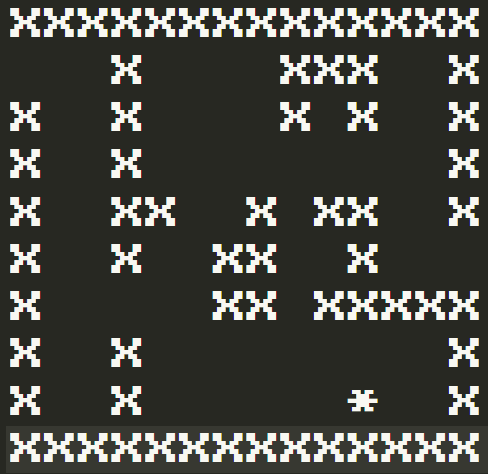